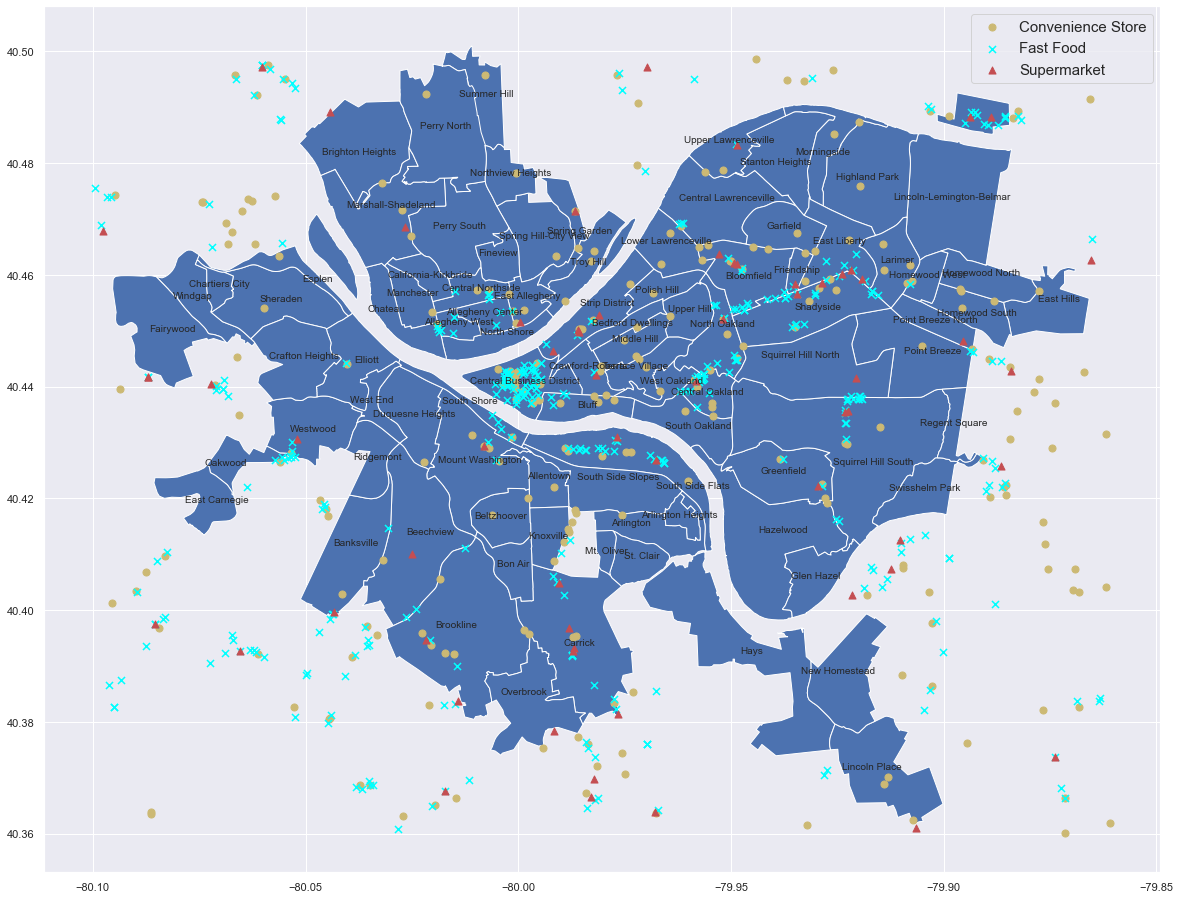

In [39]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
#from shapely.geometry import Point, Polygon

# PGH city limits
north = 40.5
south = 40.36
east  = -80.1
west  = -79.86

# import datasets
pgh_map = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # map of Pittsburgh
stores = pd.read_csv('data-conveniencesupermarkets.csv') # supermarkets/convenience stores
fast = pd.read_csv('fastfoodalleghenycountyupdatexy2.csv') # fast food restaurants

# filter out null coord data
stores = stores[stores['Lat'].notna() | stores['Lon'].notna()]
fast = fast[fast['Lat'].notna() | fast['Lon'].notna()]

# limit to values within PGH city limits
stores.drop(stores[(stores['Lat'] >= north) | (stores['Lat'] < south)].index, inplace = True)
stores.drop(stores[(stores['Lon'] >= west) | (stores['Lon'] < east)].index, inplace = True)
fast.drop(fast[(fast['Lat'] >= north) | (fast['Lat'] < south)].index, inplace = True)
fast.drop(fast[(fast['Lon'] >= west) | (fast['Lon'] < east)].index, inplace = True)

# define cartesian stuff
#crs = {'init': 'epsg:4326'} # commenting this out got rid of a warning but didn't break code. don't know why.
crs = 'epsg:4326' # added this to fix warning but I don't think it affects anything anyway
geometry = [Point(xy) for xy in zip(stores['Lon'],stores['Lat'])] # supermarket + convenience coords
geo_df = gpd.GeoDataFrame(stores, crs = crs, geometry = geometry)
geometry2 = [Point(xy) for xy in zip(fast['Lon'],fast['Lat'])] # fast food coords
geo_df2 = gpd.GeoDataFrame(fast, crs = crs, geometry = geometry2)

# converting SNAP map to lat/lon
#crs = from_string("+proj=longlat +datum=WGS84 +no_defs") 
#street_map = street_map.to_crs(crs=crs)

# create neighborhood labels on map
pgh_map['coords'] = pgh_map['geometry'].apply(lambda x: x.representative_point().coords[:])
pgh_map['coords'] = [coords[0] for coords in pgh_map['coords']]

# plot data
fig,ax = plt.subplots(figsize = (20,20)) # plot size
#ax.set_xlabel('Latitude') # x axis label on map
#ax.set_ylabel('Longitude') # y axis label on map
pgh_map.plot(ax = ax) # plot map
# append label loop
for idx, row in pgh_map.iterrows():
    plt.annotate(text = row['hood'], xy=row['coords'],
                 horizontalalignment='center')

# points
geo_df[geo_df['Category'] == 'Convenience Store'].plot(ax = ax, markersize = 50, color = 'y', marker = 'o', label = 'Convenience Store') # convenience stores
geo_df2.plot(ax = ax, markersize = 50, color = 'cyan', marker = 'x', label = 'Fast Food') # fast food
geo_df[geo_df['Category'] == 'Supermarket'].plot(ax = ax, markersize = 50, color = 'r', marker = '^', label = 'Supermarket') # supermarkets
plt.legend(prop = {'size': 15}) # legend

PROJCS["NAD83_2011_Pennsylvania_South_ftUS",GEOGCS["GCS_NAD83(2011)",DATUM["D_NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",39.3333333333333],PARAMETER["central_meridian",-77.75],PARAMETER["standard_parallel_1",40.9666666666667],PARAMETER["standard_parallel_2",39.9333333333333],PARAMETER["false_easting",1968500],PARAMETER["false_northing",0],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


<AxesSubplot:>

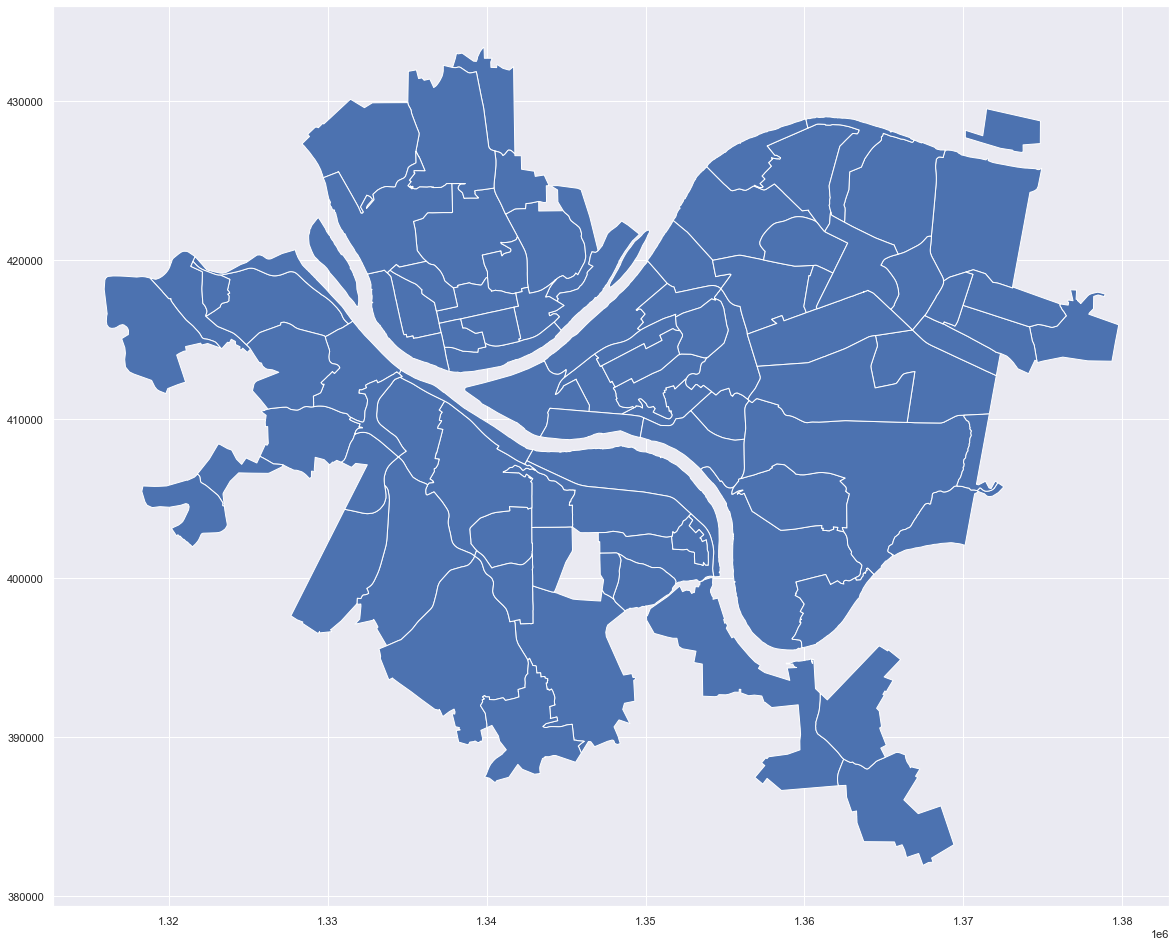

In [34]:
#from matplotlib import pyplot as plt
#from pyproj import transformer
#import numpy as np
#import seaborn as sns
#from pyproj import Transformer

snap_data = pd.read_csv('Neighborhoods_with_SNAP_Data.csv')
snap = gpd.read_file("SNAP/Neighborhood_SNAP.shp")

print(snap.crs)

fig,ax = plt.subplots(figsize = (20,20)) # plot size
transformer = Transformer.from_crs(4326, 3857, always_xy=True)
#ax.set_xlabel('Latitude') # x axis label on map
#ax.set_ylabel('Longitude') # y axis label on map
snap.plot(ax = ax) # plot map